<IPython.core.display.Javascript object>


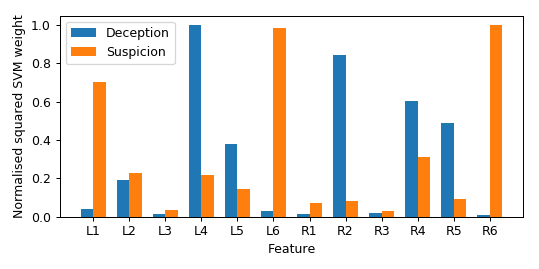

In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
# Feature importance - SVM weights extracted from training on whole dataset, using best params
######################################################################################
import numpy as np
import matplotlib.pyplot as plt

# SVM weights extracted from training on whole dataset, for deception and suspicion
w_D = [0.5059263117554609, -1.1291533701725698, -0.2706479394757416, -2.5817058891884734, 1.5845719976803014, 0.4543641079856481, -0.30662407079535087, -2.370951245329504, 0.33085152726358524, -2.0093584242685676, 1.806934617908837, 0.2459652426962517]
w_S = [-0.21374484644513964, 0.12114278835363182, 0.046492744875937075, 0.11877346665185479, 0.09601453075984098, 0.2525452692519627, -0.0686986860138919, 0.07351031136466779, 0.04239092526354598, 0.14235873528819432, 0.07743175461352832, 0.2545427821991058]

# Take absolute values
w_D = np.abs(w_D)
w_S = np.abs(w_S)
features_names = ['L'+str(i) for i in range(1,7)]
features_names.extend(['R'+str(i) for i in range(1,7)])

# SQUARED
w_D = np.square(w_D)
w_S = np.square(w_S)

width = 0.35
# Normalise
w_D = w_D / np.max(w_D)
w_S = w_S / np.max(w_S)
%matplotlib notebook
plt.figure(figsize=(6,3))

plt.bar(np.arange(len(features_names))-width/2, w_D, align='center', label='Deception', width=width)
plt.bar(np.arange(len(features_names))+width/2, w_S, align='center', label='Suspicion', width=width)
plt.xticks(range(len(features_names)), features_names)
# plt.ylabel('Scaled |SVM weight|')
plt.ylabel('Normalised squared SVM weight')
plt.xlabel('Feature')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


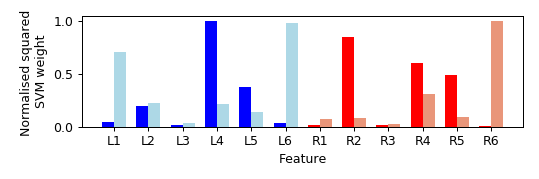

In [8]:
# Better colour presentation

plt.figure(figsize=(6,2))

w_DL = [x if i < 6 else 0. for i, x in enumerate(w_D)]
w_SL = [x if i < 6 else 0. for i, x in enumerate(w_S)]
plt.bar(np.arange(len(features_names))-width/2, w_DL, align='center', label='Deception left', width=width, color='blue')
plt.bar(np.arange(len(features_names))+width/2, w_SL, align='center', label='Suspicion left', width=width, color='lightblue')

w_DR = [0. if i < 6 else x for i, x in enumerate(w_D)]
w_SR = [0. if i < 6 else x for i, x in enumerate(w_S)]
plt.bar(np.arange(len(features_names))-width/2, w_DR, align='center', label='Deception right', width=width, color='red')
plt.bar(np.arange(len(features_names))+width/2, w_SR, align='center', label='Suspicion right', width=width, color='darksalmon')

plt.xticks(range(len(features_names)), features_names)
plt.ylabel('Normalised squared \nSVM weight')
plt.xlabel('Feature')
# plt.legend(loc='best')
plt.tight_layout()
plt.show()